## **Understanding the Business Context**

Before diving into the data, it’s important to recall the business objectives:

- **Customer Segmentation:** Identify distinct groups of customers based on their buying behaviors.
- **RFM Analysis:** Use Recency (how recently a customer made a purchase), Frequency (how often they purchase), and Monetary (how much they spend) to gauge customer value.
- **Actionable Insights:** Generate recommendations for personalized marketing and improved customer service.

The analysis helps answer key business questions such as identifying the most valuable or loyal customers, understanding purchase behavior patterns, and determining the impact of promotions.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plot_settings import set_plot_settings

set_plot_settings()

# Ensure floating-point numbers are displayed with two decimal places and a width of 20 characters for alignment
pd.options.display.float_format = lambda x: f"{x:20.2f}"
# Show all columns on output
pd.set_option("display.max_columns", 999)

In [2]:
df = pd.read_csv("../../data/interim/online_retail_2009_2010.csv")

In [4]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      525461 non-null  object 
 1   StockCode    525461 non-null  object 
 2   Description  522533 non-null  object 
 3   Quantity     525461 non-null  int64  
 4   InvoiceDate  525461 non-null  object 
 5   Price        525461 non-null  float64
 6   Customer ID  417534 non-null  float64
 7   Country      525461 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.1+ MB


**Customer ID:** About 107,927 entries are missing in Customer ID. Since customer segmentation relies on identifying individual customers (for RFM analysis), we may need to filter these out or handle them appropriately.

In [6]:
df.describe()

,Quantity,Price,Customer ID
count,525461.00,525461.00,417534.00
mean,10.34,4.69,15360.65
std,107.42,146.13,1680.81
min,-9600.00,-53594.36,12346.00
25%,1.00,1.25,13983.00
50%,3.00,2.10,15311.00
75%,10.00,4.21,16799.00
max,19152.00,25111.09,18287.00


**Statistical Summaries**

- **Quantity:**  
  - **Range:** From -9600 to 19152. The presence of negative quantities likely indicates returns or cancellations.
  - **Central Tendency:** The median is 3, suggesting that most transactions involve a small number of items.
  - **Variation:** A high standard deviation (107.42) indicates significant variability, which might be worth exploring further (e.g., separating orders and returns).

- **Price:**  
  - **Range:** From -53594.36 to 25111.09. Negative prices could be due to errors or adjustments (like refunds or cancellations), and extreme values might be outliers.
  - **Central Tendency:** The median price is 2.10, with a mean of 4.69, hinting at a right-skewed distribution where a few expensive items increase the average.

- **Customer ID:**  
  - **Range and Central Tendency:** The median is 15,311, and the mean is 15,360.65, but since this is an identifier, the actual numeric values are less important than their uniqueness and distribution.
  
- **InvoiceDate:**  
  - **Range:** The dates span from 2009-12-01 to 2010-12-09, providing a full year of transactional data. This temporal span is perfect for calculating recency and understanding seasonal patterns.

In [7]:
df.describe(include="O")

,Invoice,StockCode,Description,InvoiceDate,Country
count,525461,525461,522533,525461,525461
unique,28816,4632,4681,25296,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-06 16:57:00,United Kingdom
freq,675,3516,3549,675,485852


**Country:** Only 40 unique values, with the majority being "United Kingdom" (as indicated by the top frequency). This suggests a strong geographical focus which could be significant in customer segmentation.

### **Customer ID**

In [10]:
df[df["Customer ID"].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


- Probably drop null customer, unknow customer does not allow us to make customer segmentation.

### **Quantity**

In [11]:
df[df["Quantity"] < 0].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.00,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.00,United Kingdom


### **Invoice**

In [ ]:
df["Invoice"] = df["Invoice"].astype("str")
# Six digits number only
df[df["Invoice"].str.match("^\\d{6}$") == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.00,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.00,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.00,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.00,United Kingdom


> Is "C" the only character in Invoice?

In [ ]:
# Take only characters
df["Invoice"].str.replace("[0-9]", "", regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [14]:
df[df["Invoice"].str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


> This seems to be accounting transactions.

### **StockCode**

In [18]:
df["StockCode"] = df["StockCode"].astype("str")
# Five digits + repeated letters
df[(df["StockCode"].str.match("^\\d{5}$") == False) & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == False)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.00,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.00,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.00,Belgium
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.00,12533.00,Germany
735,C489535,D,Discount,-1,2009-12-01 12:11:00,9.00,15299.00,United Kingdom
...,...,...,...,...,...,...,...,...
524776,538147,M,Manual,1,2010-12-09 16:11:00,15.00,13090.00,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


In [ ]:
df[
    (df["StockCode"].str.match("^\\d{5}$") == False)
    & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == False)
]["StockCode"].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

In [20]:
df[df["StockCode"].str.contains("^DOT")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2379,489597,DOT,DOTCOM POSTAGE,1,2009-12-01 14:28:00,647.19,NaN,United Kingdom
2539,489600,DOT,DOTCOM POSTAGE,1,2009-12-01 14:43:00,55.96,NaN,United Kingdom
2551,489601,DOT,DOTCOM POSTAGE,1,2009-12-01 14:44:00,68.39,NaN,United Kingdom
2571,489602,DOT,DOTCOM POSTAGE,1,2009-12-01 14:45:00,59.35,NaN,United Kingdom
2619,489603,DOT,DOTCOM POSTAGE,1,2009-12-01 14:46:00,42.39,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524272,538071,DOT,DOTCOM POSTAGE,1,2010-12-09 14:09:00,885.94,NaN,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


In [23]:
# Define the list of unique non-standard StockCodes
non_standard_codes = df[
    (df["StockCode"].str.match("^\\d{5}$") == False)
    & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == False)
]["StockCode"].unique()

# Loop through each non-standard StockCode
for code in non_standard_codes:
    # Filter the DataFrame for rows matching the current StockCode
    subset = df[df["StockCode"].str.contains(f"^{code}$", regex=True)]
    
    # Print basic information about this StockCode
    print(f"\nStockCode: {code}")
    print(f"Number of occurrences: {len(subset)}")
    print(f"Unique Descriptions: {subset['Description'].unique()}")
    print(f"Price Range: {subset['Price'].min()} to {subset['Price'].max()}")
    print(f"Customer ID Null Count: {subset['Customer ID'].isnull().sum()}")
    print(f"Sample rows:\n{subset.head().to_string(index=False)}\n")


StockCode: POST
Number of occurrences: 865
Unique Descriptions: ['POSTAGE' nan]
Price Range: 0.0 to 850.0
Customer ID Null Count: 43
Sample rows:
Invoice StockCode Description  Quantity         InvoiceDate                Price          Customer ID        Country
 489439      POST     POSTAGE         3 2009-12-01 09:28:00                18.00             12682.00         France
 489444      POST     POSTAGE         1 2009-12-01 09:55:00               141.00             12636.00            USA
 489447      POST     POSTAGE         1 2009-12-01 10:10:00               130.00             12362.00        Belgium
 489526      POST     POSTAGE         6 2009-12-01 11:50:00                18.00             12533.00        Germany
C489538      POST     POSTAGE        -1 2009-12-01 12:18:00                 9.58             15796.00 United Kingdom


StockCode: D
Number of occurrences: 100
Unique Descriptions: ['Discount']
Price Range: 0.01 to 1269.51
Customer ID Null Count: 3
Sample rows:
Invoice

StockCode is meant to follow the pattern [0-9]{5} but seems to have legit values for [0-9]{5}[a-zA-Z]+

- Also contains other values:

| Code            | Description                                                  | Action              |
|-----------------|--------------------------------------------------------------|---------------------|
| DCGS            | Looks valid, some quantities are negative though and customer ID is null | Exclude from clustering |
| D               | Looks valid, represents discount values                     | Exclude from clustering |
| DOT             | Looks valid, represents postage charges                     | Exclude from clustering |
| M or m          | Looks valid, represents manual transactions                 | Exclude from clustering |
| C2              | Carriage transaction - not sure what this means             | Exclude from clustering |
| C3              | Not sure, only 1 transaction                                | Exclude             |
| BANK CHARGES or B | Bank charges                                           | Exclude from clustering |
| S               | Samples sent to customer                                    | Exclude from clustering |
| TESTXXX         | Testing data, not valid                                     | Exclude             |
| gift__XXX       | Purchases with gift cards, might be interesting for another analysis, but no customer data | Exclude |
| PADS            | Looks like a legit stock code for padding                   | Include             |
| SP1002          | Looks like a special request item, only 2 transactions, 3 look legit, 1 has 0 pricing | Exclude for now     |
| AMAZONFEE       | Looks like fees for Amazon shipping or something            | Exclude for now     |
| ADJUSTX         | Looks like manual account adjustments by admins             | Exclude for now     |

### **Description**

In [ ]:
missing_descriptions = df['Description'].isnull().sum()
print(f"Missing descriptions: {missing_descriptions}")

Missing descriptions: 2928


- This represents ~0.56% of the dataset, which is not a critical issue but should still be addressed.

In [ ]:
unique_descriptions = df['Description'].nunique()
print(f"Unique product descriptions: {unique_descriptions}")

Unique product descriptions: 4681


- Diverse range of products, which aligns with the fact that the company sells unique giftware.

In [23]:
top_descriptions = df['Description'].value_counts().head(20)
print("Top 20 most common products:\n", top_descriptions)

Top 20 most common products:
 Description
WHITE HANGING HEART T-LIGHT HOLDER    3549
REGENCY CAKESTAND 3 TIER              2212
STRAWBERRY CERAMIC TRINKET BOX        1843
PACK OF 72 RETRO SPOT CAKE CASES      1466
ASSORTED COLOUR BIRD ORNAMENT         1457
60 TEATIME FAIRY CAKE CASES           1400
HOME BUILDING BLOCK WORD              1386
JUMBO BAG RED RETROSPOT               1310
LUNCH BAG RED SPOTTY                  1274
REX CASH+CARRY JUMBO SHOPPER          1232
JUMBO STORAGE BAG SUKI                1220
PACK OF 60 PINK PAISLEY CAKE CASES    1196
WOODEN FRAME ANTIQUE WHITE            1190
LUNCH BAG  BLACK SKULL.               1179
BAKING SET 9 PIECE RETROSPOT          1176
LUNCH BAG SUKI  DESIGN                1157
HEART OF WICKER LARGE                 1151
LOVE BUILDING BLOCK WORD              1142
RED HANGING HEART T-LIGHT HOLDER      1129
SWEETHEART CERAMIC TRINKET BOX        1096
Name: count, dtype: int64


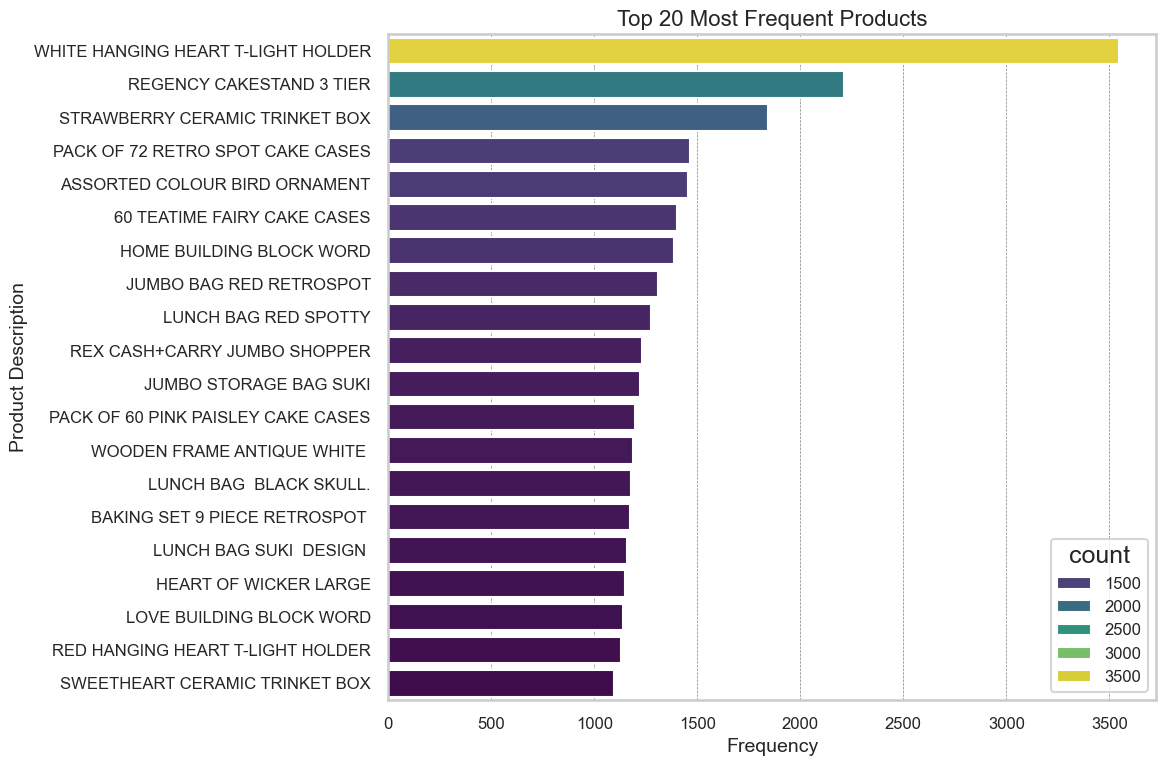

In [26]:
plt.figure(figsize=(12, 8))
sns.barplot(x=top_descriptions.values, y=top_descriptions.index, palette="viridis", hue=top_descriptions)
plt.title("Top 20 Most Frequent Products")
plt.xlabel("Frequency")
plt.ylabel("Product Description")
plt.tight_layout()
plt.show()

- The top 20 most common products are likely high-demand items.
- Many of the top-selling products are decorative items, storage bags, lunch bags, cake-related accessories, and ornaments.

In [27]:
low_freq = df['Description'].value_counts()[df['Description'].value_counts() == 1]
print(f"Products purchased only once: {len(low_freq)}")

Products purchased only once: 263


- These might be niche products, one-time purchases, or potential data errors.

In [8]:
# Group by Customer ID to find top purchased items
customer_top_items = df.groupby(["Customer ID", "Description"])["Quantity"].sum().reset_index()
customer_top_items.sort_values(by="Quantity", ascending=False).head(20)

,Customer ID,Description,Quantity
69071,13902.00,BLACK AND WHITE PAISLEY FLOWER MUG,25164
162564,15838.00,BROCADE RING PURSE,23760
207387,16754.00,WORLD WAR 2 GLIDERS ASSTD DESIGNS,20160
267992,17940.00,PACK OF 12 SUKI TISSUES,15800
267988,17940.00,PACK OF 12 PINK PAISLEY TISSUES,15008
267993,17940.00,PACK OF 12 WOODLAND TISSUES,14320
267990,17940.00,PACK OF 12 RED SPOTTY TISSUES,14008
69109,13902.00,SET/6 STRAWBERRY PAPER CUPS,12960
69112,13902.00,SET/6 WOODLAND PAPER PLATES,12960
69111,13902.00,SET/6 WOODLAND PAPER CUPS,12744


- We see a bulk buyers pattern, this suggests certain customers may be wholesalers. The dominance of tissue packs and mugs also implies strong demand in those categories.

In [12]:
# Find the most purchased item per customer
top_items_per_customer = customer_top_items.loc[customer_top_items.groupby("Customer ID")["Quantity"].idxmax()]
top_items_per_customer

,Customer ID,Description,Quantity
27,12346.00,This is a test product.,45
69,12347.00,MINI PAINT SET VINTAGE,36
99,12348.00,60 TEATIME FAIRY CAKE CASES,24
214,12349.00,WRAP PINK FAIRY CAKES,50
215,12351.00,BLUE SCANDINAVIAN PAISLEY WRAP,25
...,...,...,...
281539,18283.00,HOMEMADE JAM SCENTED CANDLES,12
281667,18284.00,RED SPOTS WRAP,50
281681,18285.00,PAPER BUNTING WHITE LACE,80
281700,18286.00,DINOSAUR KEYRINGS ASSORTED,36


- This highlights that different customers focus on specific product categories.

In [ ]:
# Count purchases per customer to identify one-time buyers
customer_purchases = df.groupby("Customer ID")["Invoice"].nunique().reset_index()
one_time_buyers = customer_purchases[customer_purchases["Invoice"] == 1]
# Count of one-time buyers
one_time_buyers_count = one_time_buyers.shape[0]
print(f"Number of one-time buyers: {one_time_buyers_count}")

Number of one-time buyers: 1267


In [18]:
# Find most common products among one-time buyers
one_time_purchases = df[df["Customer ID"].isin(one_time_buyers["Customer ID"])]
top_items_one_time_buyers = one_time_purchases["Description"].value_counts().head(20)
print("Top 10 most common products among one-time buyers:")
print(top_items_one_time_buyers)

Top 10 most common products among one-time buyers:
Description
WHITE HANGING HEART T-LIGHT HOLDER    163
REX CASH+CARRY JUMBO SHOPPER          113
REGENCY CAKESTAND 3 TIER               79
PACK OF 6 BIRDY GIFT TAGS              75
60 TEATIME FAIRY CAKE CASES            73
Manual                                 72
VINTAGE SNAP CARDS                     69
ASSORTED COLOUR BIRD ORNAMENT          69
PAPER CHAIN KIT 50'S CHRISTMAS         67
BAKING SET 9 PIECE RETROSPOT           67
PACK OF 60 PINK PAISLEY CAKE CASES     67
VINTAGE HEADS AND TAILS CARD GAME      66
HEART OF WICKER LARGE                  64
PLASTERS IN TIN CIRCUS PARADE          63
FELTCRAFT 6 FLOWER FRIENDS             61
HOME BUILDING BLOCK WORD               58
PLASTERS IN TIN VINTAGE PAISLEY        57
FELTCRAFT BUTTERFLY HEARTS             56
RED HANGING HEART T-LIGHT HOLDER       56
HANGING HEART ZINC T-LIGHT HOLDER      55
Name: count, dtype: int64


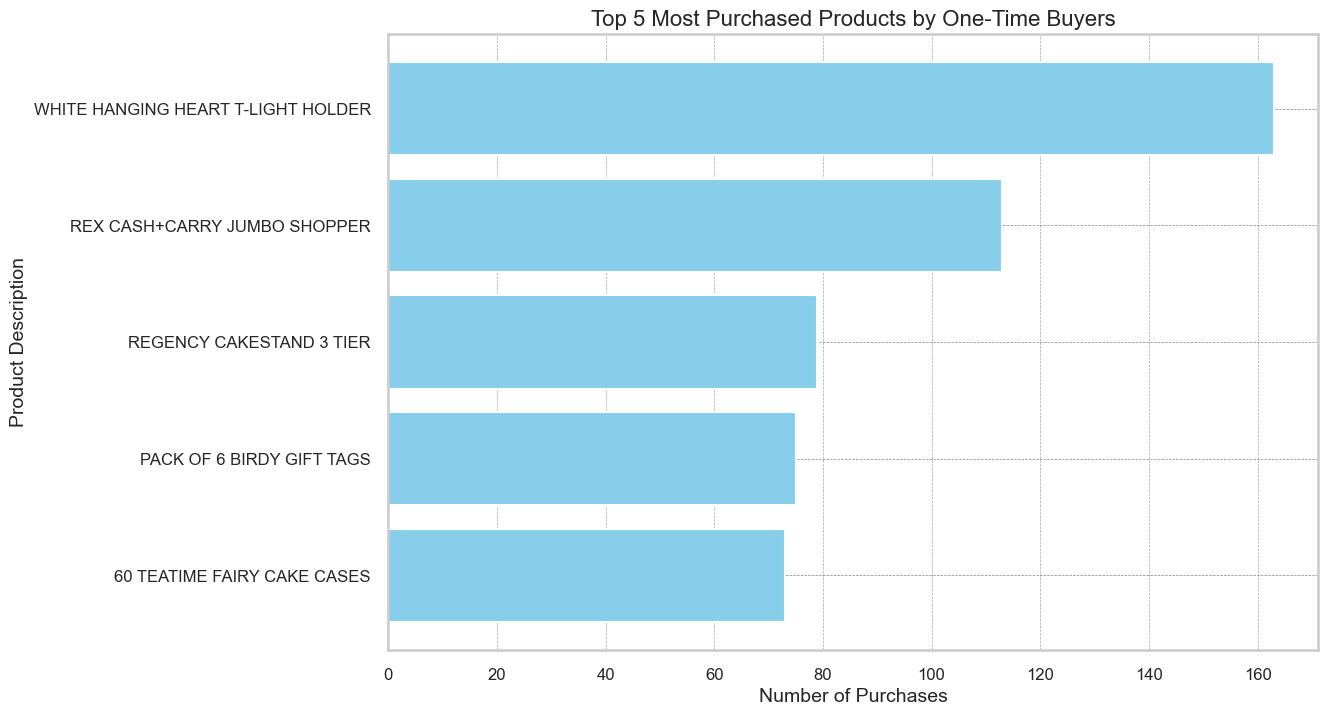

In [22]:
# Data for the plot
products = [
    "WHITE HANGING HEART T-LIGHT HOLDER",
    "REX CASH+CARRY JUMBO SHOPPER",
    "REGENCY CAKESTAND 3 TIER",
    "PACK OF 6 BIRDY GIFT TAGS",
    "60 TEATIME FAIRY CAKE CASES"
]
purchase_counts = [163, 113, 79, 75, 73]

# Create the bar plot
# plt.figure(figsize=(10, 6))
plt.barh(products, purchase_counts, color="skyblue")
plt.xlabel("Number of Purchases")
plt.ylabel("Product Description")
plt.title("Top 5 Most Purchased Products by One-Time Buyers")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.grid(axis="x", alpha=0.7)
plt.show()

**Total One-Time Buyers**: 1,267 (≈ 29% of all customers)
- **Common products purchased once**:
  - WHITE HANGING HEART T-LIGHT HOLDER (163 times)
  - REX CASH+CARRY JUMBO SHOPPER (113 times)
  - REGENCY CAKESTAND 3 TIER (79 times)
  - PACK OF 6 BIRDY GIFT TAGS (75 times)
  - 60 TEATIME FAIRY CAKE CASES (73 times)

The presence of decorative and gifting items in this list suggests many one-time buyers might be **seasonal shoppers** or **gift buyers**.


### **Country**
The majority of transactions come from the United Kingdom (485,852 rows, ~92%).

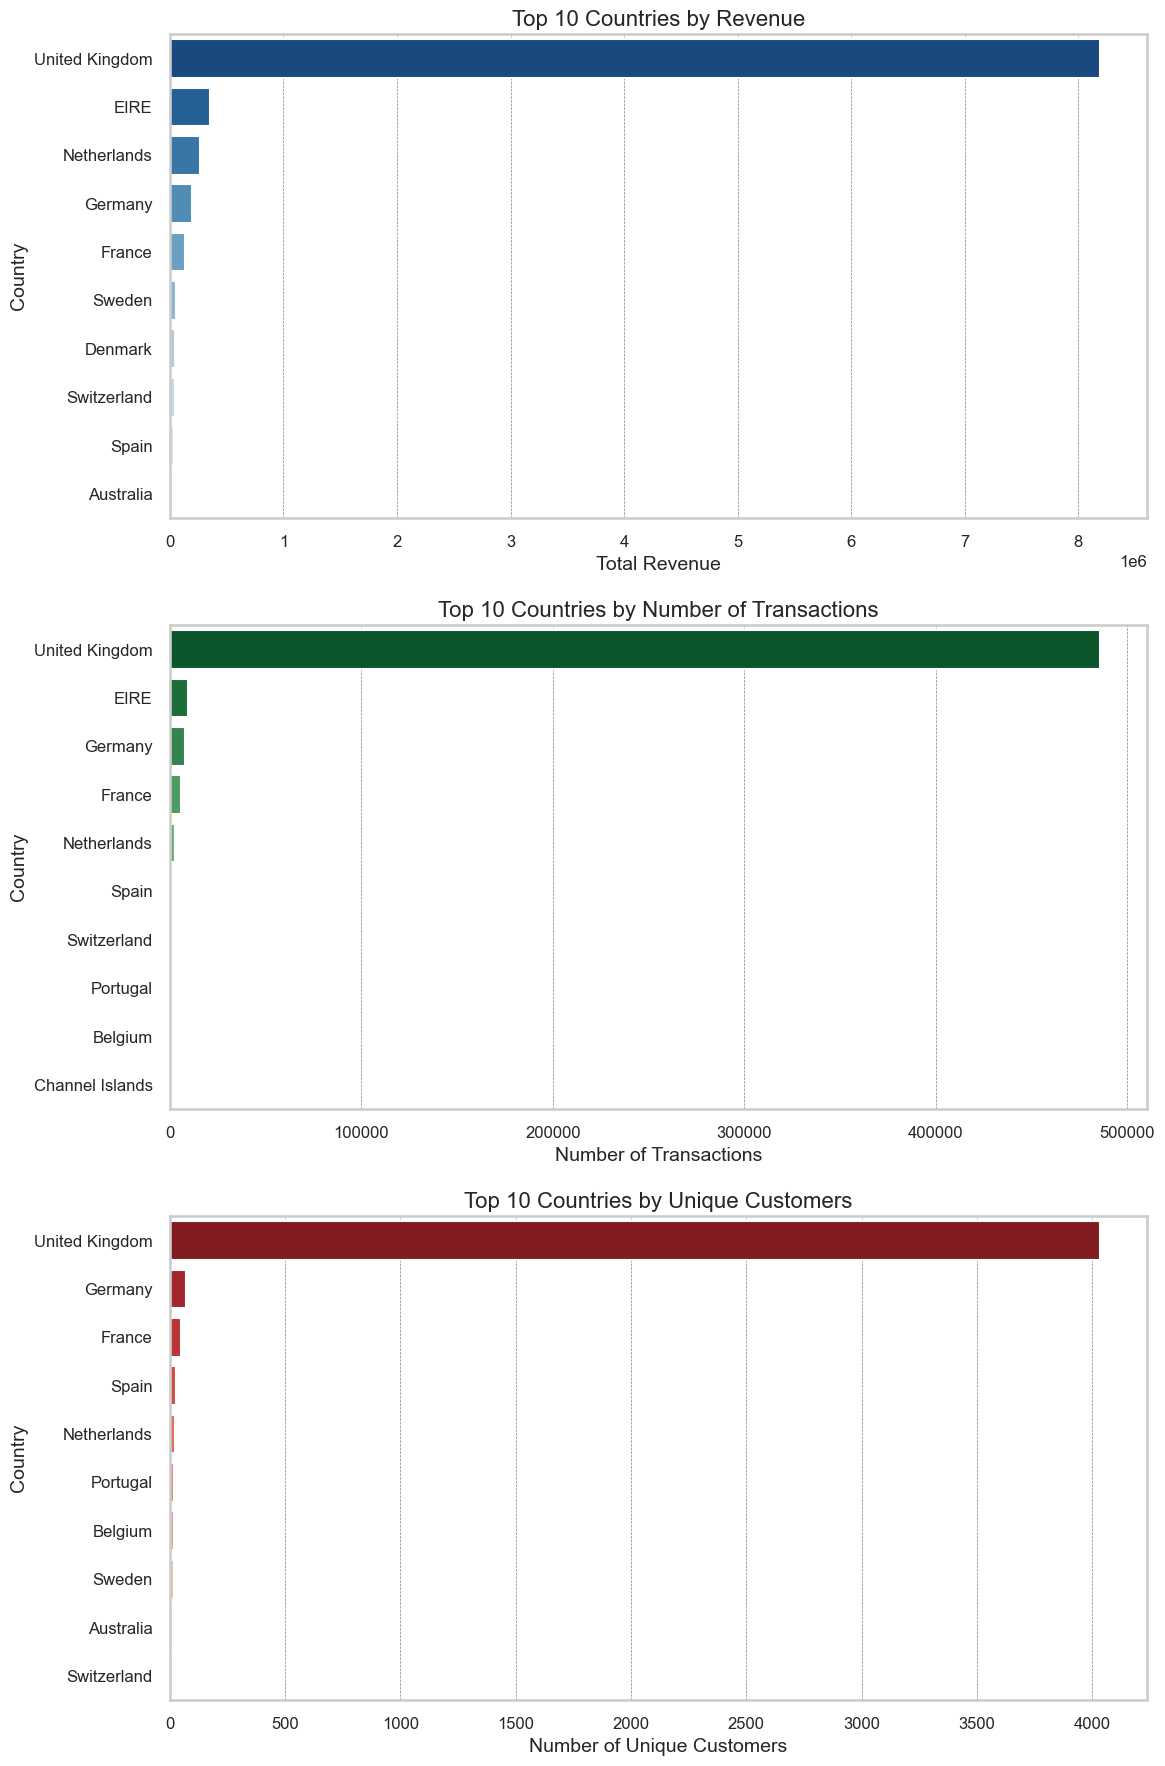

In [ ]:
# Calculate revenue per country
df["Revenue"] = df["Quantity"] * df["Price"]
country_revenue = (
    df.groupby("Country")["Revenue"].sum().sort_values(ascending=False).head(10)
)

# Count transactions per country
country_transactions = df["Country"].value_counts().head(10)

# Count unique customers per country
country_customers = (
    df.groupby("Country")["Customer ID"].nunique().sort_values(ascending=False).head(10)
)

# Set up the figure
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Revenue per country
sns.barplot(
    x=country_revenue.values,
    y=country_revenue.index,
    ax=axes[0],
    hue=country_revenue.index,
    palette="Blues_r",
    legend=False,
)
axes[0].set_title("Top 10 Countries by Revenue")
axes[0].set_xlabel("Total Revenue")
axes[0].set_ylabel("Country")

# Transactions per country
sns.barplot(
    x=country_transactions.values,
    y=country_transactions.index,
    ax=axes[1],
    hue=country_transactions.index,
    palette="Greens_r",
    legend=False,
)
axes[1].set_title("Top 10 Countries by Number of Transactions")
axes[1].set_xlabel("Number of Transactions")
axes[1].set_ylabel("Country")

# Unique customers per country
sns.barplot(
    x=country_customers.values,
    y=country_customers.index,
    ax=axes[2],
    hue=country_customers.index,
    palette="Reds_r",
    legend=False,
)
axes[2].set_title("Top 10 Countries by Unique Customers")
axes[2].set_xlabel("Number of Unique Customers")
axes[2].set_ylabel("Country")

plt.tight_layout()
plt.show()